In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ecommerce_sales.csv")

In [3]:
df.head()

,Order_ID,Customer_Name,City,Product_Category,Sub_Product,Brand,Quantity,Price,Total_Sales,Order_Date,Payment_Mode,Delivery_Status
0,1001,Hridaan Rau,Jabalpur,Clothing,Kurti,Bajaj,1,23694,23694,2024-07-28,COD,Pending
1,1002,Krish Chowdhury,Pune,Home Appliances,Washing Machine,Haldiram,5,1808,9040,2025-07-16,NaN,Delivered
2,1003,Mahika Bedi,Indore,Electronics,Camera,Tata,5,45448,227240,2024-01-27,UPI,Cancelled
3,1004,Divit Subramaniam,Mumbai,Electronics,Camera,Haldiram,5,14755,73775,2025-04-18,COD,Delivered
4,1005,Ivana Subramaniam,Mumbai,Electronics,Headphones,FabIndia,2,9088,18176,2025-03-03,Debit Card,Pending


__Collect_info__

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          200 non-null    int64         
 1   Customer_Name     200 non-null    object        
 2   City              200 non-null    object        
 3   Product_Category  200 non-null    object        
 4   Sub_Product       200 non-null    object        
 5   Brand             200 non-null    object        
 6   Quantity          200 non-null    int64         
 7   Price             200 non-null    int64         
 8   Total_Sales       200 non-null    int64         
 9   Order_Date        200 non-null    datetime64[ns]
 10  Payment_Mode      200 non-null    object        
 11  Delivery_Status   200 non-null    object        
 12  Order_date        200 non-null    datetime64[ns]
 13  Year              200 non-null    int32         
 14  Month             200 non-

__Finding Null Values__ 

In [25]:
df.isnull().sum()

Order_ID            0
Customer_Name       0
City                0
Product_Category    0
Sub_Product         0
Brand               0
Quantity            0
Price               0
Total_Sales         0
Order_Date          0
Payment_Mode        0
Delivery_Status     0
Order_date          0
Year                0
Month               0
dtype: int64

__Fill Null value__

In [27]:
df["Brand"].fillna("Not Define", inplace= True)

C:\Users\pushp\AppData\Local\Temp\ipykernel_20180\2532318306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Brand"].fillna("Not Define", inplace= True)


In [28]:
df["Payment_Mode"].fillna("Not Define", inplace= True)

C:\Users\pushp\AppData\Local\Temp\ipykernel_20180\1446697959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Payment_Mode"].fillna("Not Define", inplace= True)


In [29]:
df["Delivery_Status"].fillna("Not Updated", inplace= True)

C:\Users\pushp\AppData\Local\Temp\ipykernel_20180\3801050165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Delivery_Status"].fillna("Not Updated", inplace= True)


__Change Date type Str to Date__

In [30]:
df["Order_date"] = pd.to_datetime(df["Order_Date"])

__Analysis Questions__

__Question 1. Total number of orders in the dataset.__

In [31]:
df["Order_ID"].count()

np.int64(200)

__Find the count of orders for each brand.__


In [11]:
df["Brand"].value_counts()


Brand
FabIndia      32
Tata          31
Boat          28
Haldiram      27
Not Define    25
VIP           24
Bajaj         21
Reliance      12
Name: count, dtype: int64

__Find the most frequently used payment mode.__

Payment_Mode
Debit Card     41
COD            40
Credit Card    37
Wallet         32
Not Define     25
UPI            25
Name: count, dtype: int64


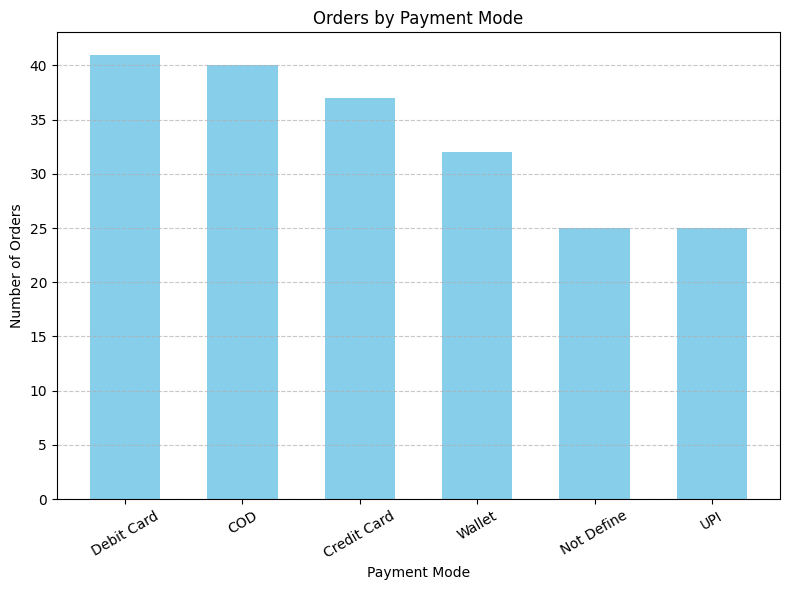

In [ ]:
Payment_mode = df["Payment_Mode"].value_counts()
print(Payment_mode)

Payment_mode = df["Payment_Mode"].value_counts()

plt.figure(figsize=(8,6))
plt.bar(Payment_mode.index, Payment_mode.values, color='skyblue', width=0.6)
plt.title('Orders by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





__Count how many orders are "Delivered" vs "Not Updated".__

Delivery_Status
Delivered      62
Not Updated    40
Name: count, dtype: int64


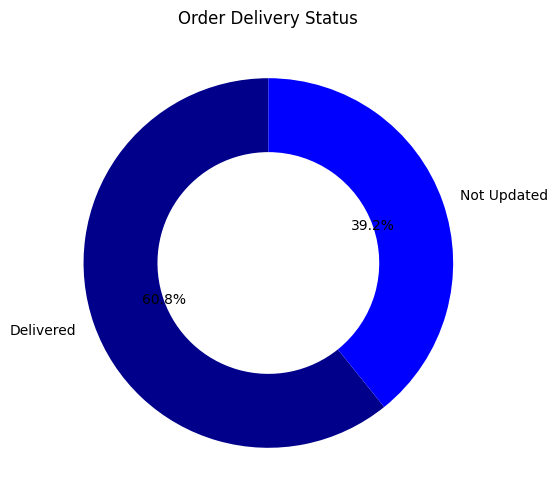

In [ ]:
order_update = df["Delivery_Status"].value_counts().loc[["Delivered", "Not Updated"]]
print(order_update)

order_update = df["Delivery_Status"].value_counts().loc[["Delivered", "Not Updated"]]

plt.figure(figsize=(6,6))
colors = ['#00008B', '#0000FF'] 
plt.pie(order_update, labels=order_update.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width':0.4})

plt.title('Order Delivery Status')
plt.show()


__Find the top 3 cities with the highest number of orders.__

City
Mumbai    48
Bhopal    42
Pune      39
Name: count, dtype: int64


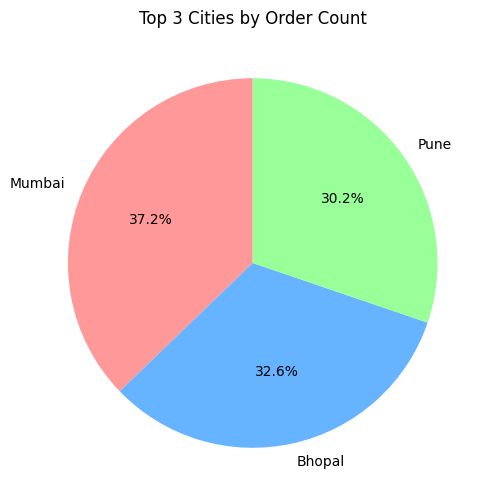

In [ ]:
City_with_order = df["City"].value_counts().head(3)
print(City_with_order)

City_with_order = df["City"].value_counts().head(3)

plt.figure(figsize=(6,6))
City_with_order.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Top 3 Cities by Order Count')
plt.ylabel('') 
plt.show()


__Which brand generated the maximum revenue?__

Brand
Tata          3416882
FabIndia      3003423
Boat          2693246
Haldiram      2616115
Not Define    2458903
VIP           2170530
Bajaj         1810248
Reliance       800463
Name: Total_Sales, dtype: int64


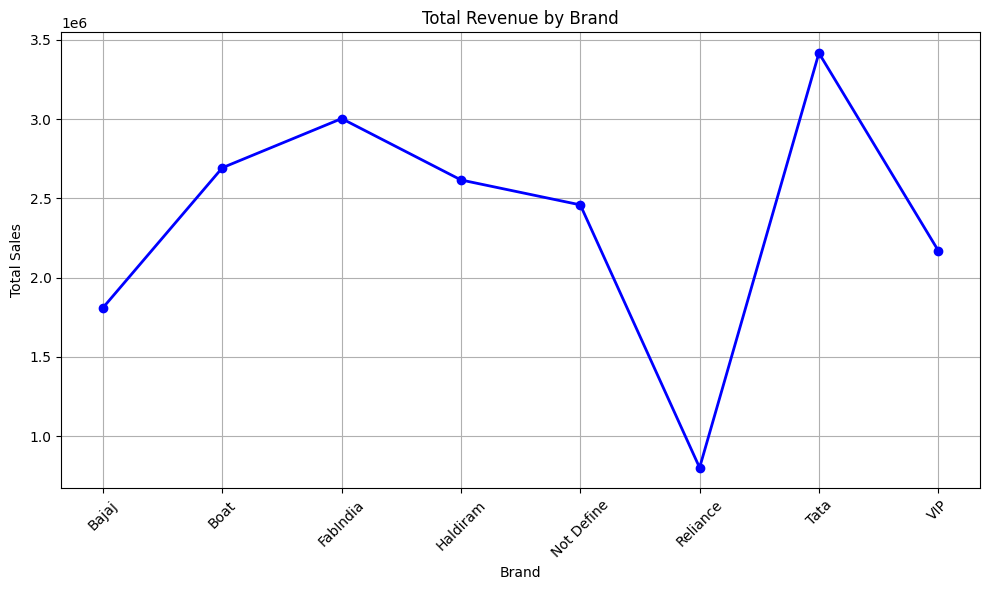

In [ ]:
Total_revenue = df.groupby("Brand")["Total_Sales"].sum().sort_values(ascending= False)
print(Total_revenue)

Total_revenue = df.groupby("Brand")["Total_Sales"].sum()


plt.figure(figsize=(10,6))
plt.plot(Total_revenue.index, Total_revenue.values, marker='o', color='blue', linewidth=2)
plt.title('Total Revenue by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


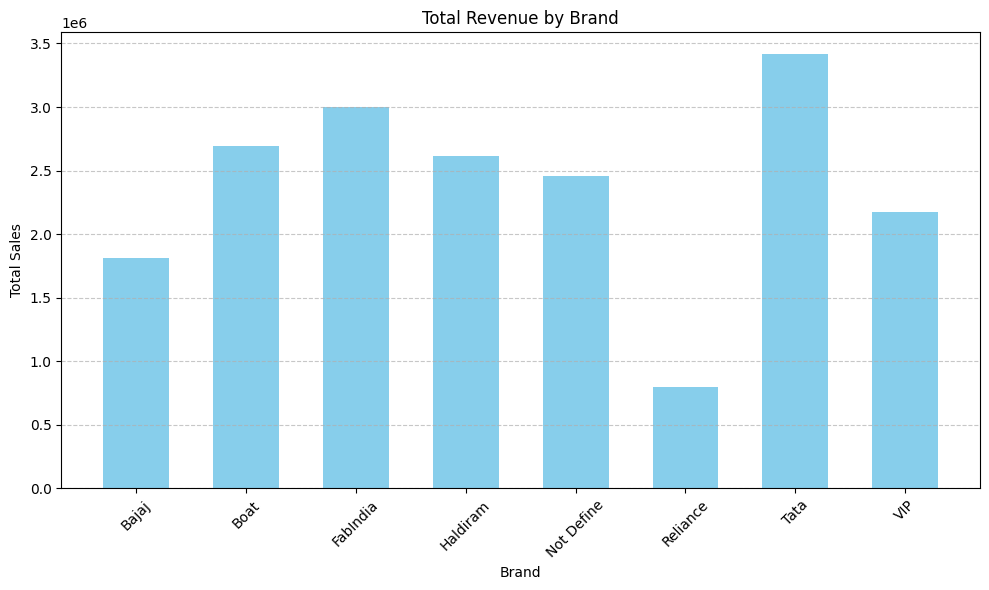

In [83]:
import matplotlib.pyplot as plt

# Grouping total revenue by Brand
Total_revenue = df.groupby("Brand")["Total_Sales"].sum()

# Plotting Bar Chart
plt.figure(figsize=(10,6))
plt.bar(Total_revenue.index, Total_revenue.values, color='skyblue', width=0.6)
plt.title('Total Revenue by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


__List the top 5 customers who placed the highest number of orders.__

In [16]:
Customer_based_order = df.groupby("Customer_Name")["Customer_Name"].count().sort_values(ascending= False).head(5)
print(Customer_based_order)

Customer_Name
Aaina Ravel     1
Aarna Butala    1
Aarna Dhawan    1
Aarna Keer      1
Aarush Rege     1
Name: Customer_Name, dtype: int64


__Find the average sales value per order.__

In [17]:
Avg_order_value = df["Total_Sales"].mean()
print(Avg_order_value)

94849.05


__Show total sales grouped by year from Order_Date.__

In [18]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])



In [19]:
df["Year"] = df["Order_Date"].dt.year


Year
2023     3075948
2024    11115217
2025     4778645
Name: Total_Sales, dtype: int64


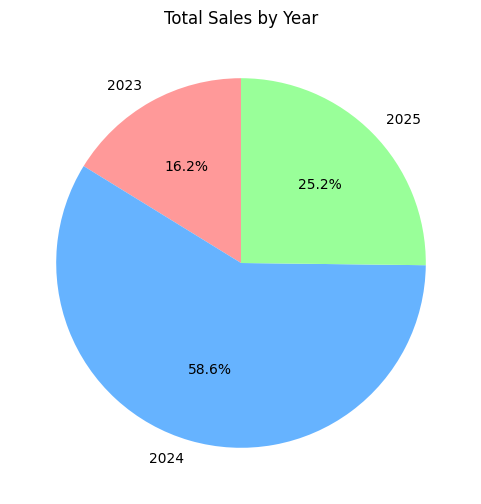

In [ ]:
Sales_by_year = df.groupby("Year")["Total_Sales"].sum()
print(Sales_by_year)

Sales_by_year = df.groupby("Year")["Total_Sales"].sum()


plt.figure(figsize=(6,6))
Sales_by_year.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Total Sales by Year')
plt.ylabel('') 
plt.show()


__Plot monthly total sales for all years combined.__

In [21]:
df["Month"] = df["Order_Date"].dt.month_name()


In [22]:
df.head()

,Order_ID,Customer_Name,City,Product_Category,Sub_Product,Brand,Quantity,Price,Total_Sales,Order_Date,Payment_Mode,Delivery_Status,Order_date,Year,Month
0,1001,Hridaan Rau,Jabalpur,Clothing,Kurti,Bajaj,1,23694,23694,2024-07-28,COD,Pending,2024-07-28,2024,July
1,1002,Krish Chowdhury,Pune,Home Appliances,Washing Machine,Haldiram,5,1808,9040,2025-07-16,Not Define,Delivered,2025-07-16,2025,July
2,1003,Mahika Bedi,Indore,Electronics,Camera,Tata,5,45448,227240,2024-01-27,UPI,Cancelled,2024-01-27,2024,January
3,1004,Divit Subramaniam,Mumbai,Electronics,Camera,Haldiram,5,14755,73775,2025-04-18,COD,Delivered,2025-04-18,2025,April
4,1005,Ivana Subramaniam,Mumbai,Electronics,Headphones,FabIndia,2,9088,18176,2025-03-03,Debit Card,Pending,2025-03-03,2025,March


Year  Month    
2023  December     1135018
      November      374885
      October      1108961
      September     457084
2024  April         671453
      August       1774794
      December      831854
      February      919657
      January      1534912
      July          342842
      June          244097
      March        1039159
      May           574558
      November      536860
      October      1381357
      September    1263674
2025  April         924833
      August        768342
      February      868978
      January       377553
      July          679760
      June          303422
      March         203130
      May           275256
      September     377371
Name: Total_Sales, dtype: int64


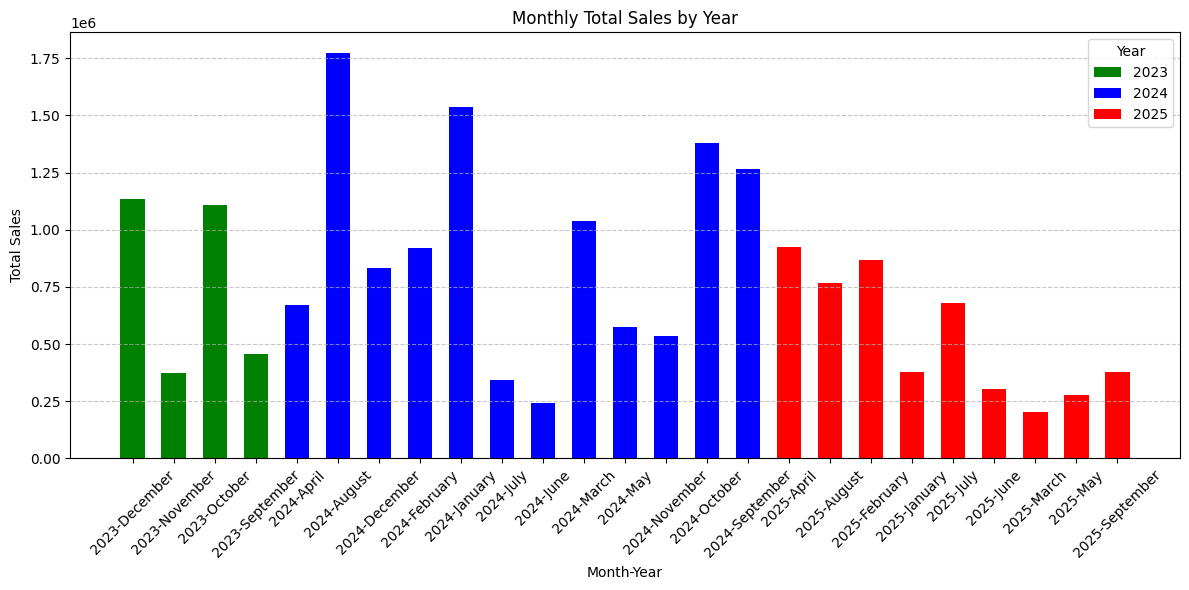

In [ ]:
Monthly_sale = df.groupby(["Year","Month"])["Total_Sales"].sum()
print(Monthly_sale)

Monthly_sale = df.groupby(["Year","Month"])["Total_Sales"].sum().reset_index()

Monthly_sale['Month_Year'] = Monthly_sale['Year'].astype(str) + '-' + Monthly_sale['Month'].astype(str)

plt.figure(figsize=(12,6))

years = Monthly_sale['Year'].unique()
colors = ['green', 'blue', 'red', 'orange', 'purple']

for i, year in enumerate(years):
    data = Monthly_sale[Monthly_sale['Year'] == year]
    plt.bar(data['Month_Year'], data['Total_Sales'], color=colors[i % len(colors)], width=0.6, label=str(year))

plt.title('Monthly Total Sales by Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

__Find if "Cash on Delivery" orders have more "Not Updated" delivery status compared to "Online" ones.__

Payment_Mode
COD            10
Credit Card     9
Debit Card      8
Not Define      2
UPI             5
Wallet          6
Name: Order_ID, dtype: int64


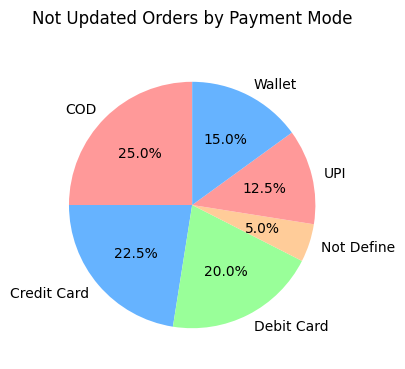

In [ ]:
not_updated_orders = df[df["Delivery_Status"] == "Not Updated"]

comparison = not_updated_orders.groupby("Payment_Mode")["Order_ID"].count()
print(comparison)

comparison = not_updated_orders.groupby("Payment_Mode")["Order_ID"].count()


plt.figure(figsize=(4,4)) 
comparison.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Not Updated Orders by Payment Mode', pad=20)
plt.ylabel('') 
plt.show()



__Find the most popular sub-product (based on total orders).__

Sub_Product
Laptop    19
Name: count, dtype: int64


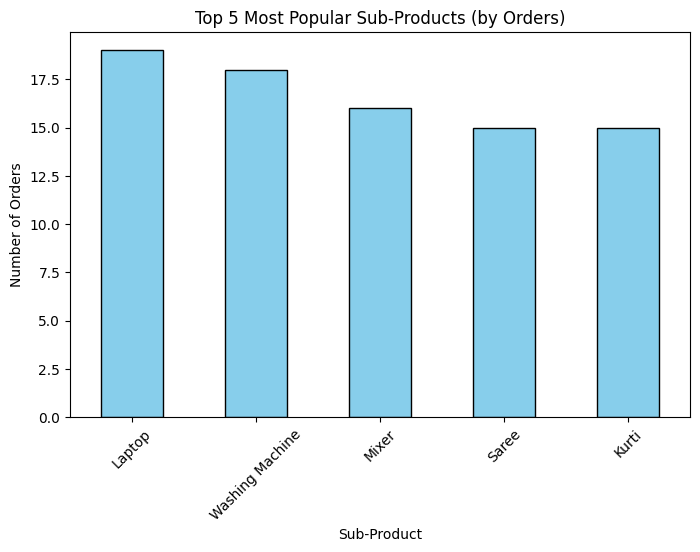

In [69]:
best_product = df.groupby("Sub_Product")["Sub_Product"].value_counts().sort_values(ascending= False).head(1)
print(best_product)

popular_products = df["Sub_Product"].value_counts().head(5)

plt.figure(figsize=(8,5))
popular_products.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 5 Most Popular Sub-Products (by Orders)")
plt.xlabel("Sub-Product")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

__Find customers who ordered more than 5 times.__

In [49]:
Customer_order = df.groupby("Customer_Name")["Order_ID"].count()
regular_order = Customer_order[Customer_order > 1]
print(regular_order)

Series([], Name: Order_ID, dtype: int64)


__Find all orders where Sales_Amount > 10,00,000.__



Sub_Product
Laptop             2029195
Mixer              1501567
Washing Machine    1454602
Fan                1429378
Headphones         1376410
Saree              1355261
Fridge             1346514
T-Shirt            1326350
Mobile             1307125
Kurti              1193516
Microwave          1090941
Name: Total_Sales, dtype: int64


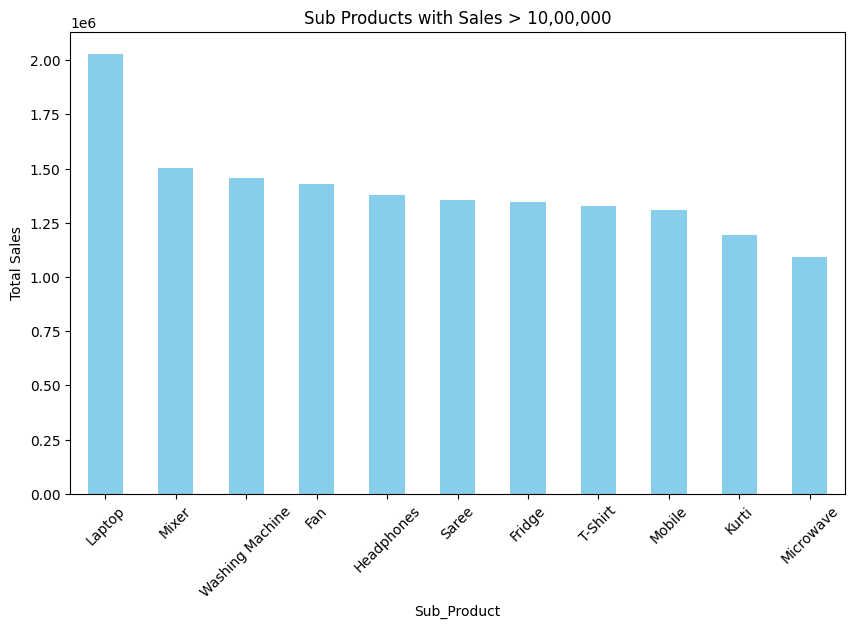

In [ ]:
Total_sales = df.groupby("Sub_Product")["Total_Sales"].sum()
Sales_Amount = Total_sales[Total_sales > 1000000].sort_values(ascending= False)
print(Sales_Amount)


Total_sales = df.groupby("Sub_Product")["Total_Sales"].sum()
Sales_Amount = Total_sales[Total_sales > 1000000].sort_values(ascending=False)

plt.figure(figsize=(10,6))
Sales_Amount.plot(kind='bar', color='skyblue')
plt.title('Sub Products with Sales > 10,00,000')
plt.xlabel('Sub_Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


__Create a pivot table showing total revenue by city and brand.__

In [60]:
pd.pivot_table(
    df,
    values="Total_Sales",        # what to summarize
    index="City",                # rows
    columns="Brand",             # columns
    aggfunc="sum",               # how to aggregate
    fill_value=0                 # replace NaN with 0
)


Brand,Bajaj,Boat,FabIndia,Haldiram,Not Define,Reliance,Tata,VIP
City,,,,,,,,
Bhopal,817173,872968,759618,486051,450816,45457,750137,245611
Indore,205206,362795,451634,393883,310250,207455,645316,578027
Jabalpur,229895,456581,581919,654898,460352,253721,575376,389869
Mumbai,307766,748438,516688,563385,517288,245655,706774,244441
Pune,250208,252464,693564,517898,720197,48175,739279,712582
